# Data Acquisition

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
employee=pd.read_csv("C:/Users/Abhinav Tripathi/Downloads/ML case Study.csv",header=0,sep="\t")
college=pd.read_csv("C:/Users/Abhinav Tripathi/Downloads/Colleges.csv",header=0)
city=pd.read_csv("C:/Users/Abhinav Tripathi/Downloads/cities.csv",header=0,sep="\t")


# Data Preprocessing

## 1. Data Cleaning and and imputing missing values

In [5]:
tier1=college["Tier 1"].tolist()
tier2=college["Tier 2"].tolist()
tier3=college["Tier 3"].tolist()

In [6]:
metro=city["Metro_city"].tolist()
nonmetro=city["Non_metro_city"].tolist()

In [7]:
##checking for missing values
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous_CTC         1589 non-null   int64  
 4   Previous_job_change  1589 non-null   int64  
 5   Graduation_Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


In [8]:
city['Non_metro_city'].fillna('Null',inplace=True)

In [9]:
college['Tier 1'].fillna('Null',inplace=True)
college['Tier 3'].fillna('Null',inplace=True)

In [10]:
for item in employee['College']:
    if item in tier1:
        employee['College'].replace(item,'Tier1',inplace=True)
    elif item in tier2:
        employee['College'].replace(item,'Tier2',inplace=True)
    elif item in tier3:
        employee['College'].replace(item,'Tier3',inplace=True)


In [11]:
for item in employee['City']:
    if item in metro:
        employee['City'].replace(item,'metro',inplace=True)
    elif item in nonmetro:
        employee['City'].replace(item,'non_metro',inplace=True)

## 2. Creation of dummy variables 

In [13]:
employee=pd.get_dummies(employee,drop_first=True)

## 3. Univariate Analysis of the data

In [15]:
employee.describe()

,Previous_CTC,Previous_job_change,Graduation_Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


## 4. Bivariate Analysis of the data

In [17]:
employee.corr()

,Previous_CTC,Previous_job_change,Graduation_Marks,EXP (Month),CTC,College_Tier2,College_Tier3,City_non_metro,Role_Manager
Previous_CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.010947,0.042438,-0.004644,0.012321
Previous_job_change,0.005756,1.000000,0.019267,0.023488,0.011370,0.004271,-0.050794,-0.051670,-0.017150
Graduation_Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018419,0.012021,0.018616,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.014558,0.017427,0.023613,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.012346,-0.032149,0.020365,0.621311
College_Tier2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,1.000000,-0.465741,-0.022917,-0.004865
College_Tier3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.465741,1.000000,0.024288,-0.010706
City_non_metro,-0.004644,-0.051670,0.018616,0.023613,0.020365,-0.022917,0.024288,1.000000,0.048671
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.004865,-0.010706,0.048671,1.000000


## 5. Creation of response and predictor variables

In [19]:
x_multi=employee.drop('CTC',axis=1)
y_multi=employee['CTC']

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=42)

# Linear Regression 

In [23]:
from sklearn.linear_model import LinearRegression
# Creating and Fitting the Linear regression model on the training data
lm=LinearRegression()
lm.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Evaluating R2 and MSE scores for train and test data
r2_test=r2_score(y_test,y_test_pred)
r2_train=r2_score(y_train,lm.predict(x_train))
mse=mean_squared_error(y_test,y_test_pred)
print('R2 score for train data :', r2_train)
print('R2 score for test data :', r2_test)
print('Mean Squared Error:', mse)

R2 score for train data : 0.5143760741179937
R2 score for test data : 0.5935474362486274
Mean Squared Error: 77325555.34582897


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


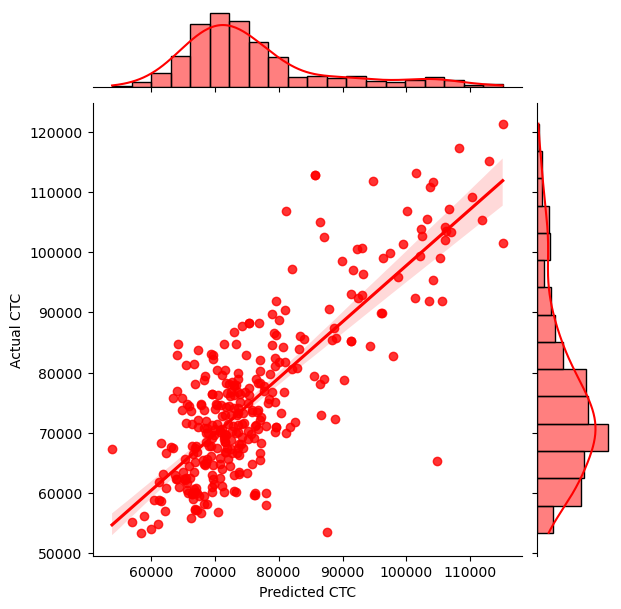

In [59]:
# Linear regression scatterplot of Actual CTC vs Predicted CTC
sns.jointplot(x = y_test_pred, y =y_test, kind = 'reg',color='red')
plt.xlabel('Predicted CTC')
plt.ylabel('Actual CTC')
plt.show()

# Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
# Creating and Fitting the Ridge regression model on the training data
ridge= Ridge(alpha=1)
ridge.fit(x_train, y_train)
# Prediction on the train and test data
y_train_predict= ridge.predict(x_train)
y_test_predict= ridge.predict(x_test)
# Evaluating R2 and MSE scores for train and test data
r2_train= r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
mse= mean_squared_error(y_test, y_test_predict)
print('R2 Score for Train Data (Ridge):', r2_train)
print('R2 Score for Test Data (Ridge):', r2_test)
print('Mean Squared Error (Ridge):', mse )

R2 Score for Train Data (Ridge): 0.5143672138573038
R2 Score for Test Data (Ridge): 0.592859866896444
Mean Squared Error (Ridge): 77456361.95584428


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


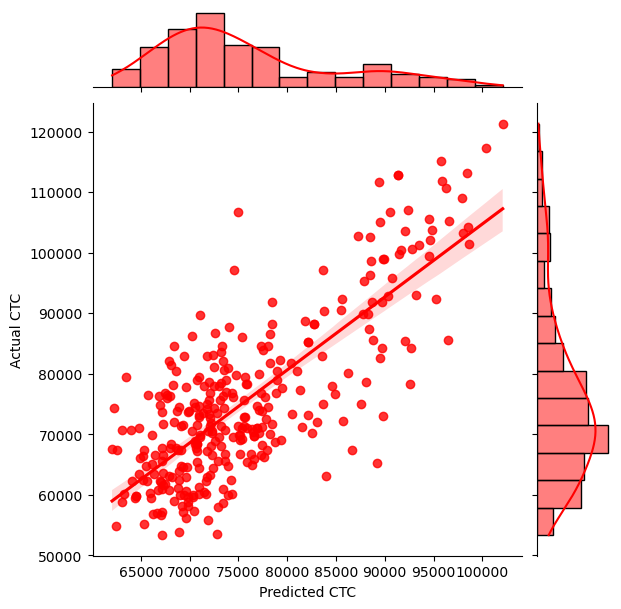

In [75]:
# Ridge regression scatterplot of Actual CTC vs Predicted CTC
sns.jointplot(x = ridge.predict(x_test), y =y_test, kind = 'reg',color='red')
plt.xlabel('Predicted CTC')
plt.ylabel('Actual CTC')
plt.show()

# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Creating and Fitting the Lasso regression model on the training data
lasso= Lasso(alpha=1)
lasso.fit(x_train, y_train)
# Prediction on the train and test data
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)
# Evaluating R2 and MSE scores for train and test data
r2_train_lasso = r2_score(y_train, y_train_pred)
r2_test_lasso = r2_score(y_test, y_test_pred)
mse_lasso = mean_squared_error(y_test, y_test_pred)
print('R2 Score for Train Data (Lasso):', r2_train_lasso)
print('R2 Score for Test Data (Lasso):', r2_test_lasso)
print('Mean Squared Error:', mse_lasso)

R2 Score for Train Data (Lasso): 0.5143759584335716
R2 Score for Test Data (Lasso): 0.5935008574456464
Mean Squared Error: 77334416.72875297


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


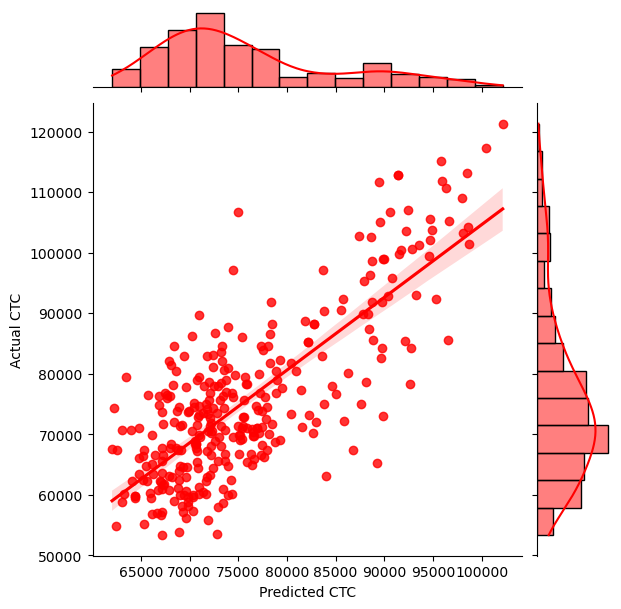

In [81]:
# Lasso regression scatterplot of Actual CTC vs Predicted CTC
sns.jointplot(x = lasso.predict(x_test), y =y_test, kind = 'reg',color='red')
plt.xlabel('Predicted CTC')
plt.ylabel('Actual CTC')
plt.show()

# RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor(n_estimators=1000, random_state=42)
# Creating and Fitting the model on training data
random_forest.fit(x_train, y_train)
RandomForestRegressor(random_state=42)
# Predictions on the test and train data
y_test_pred= random_forest.predict(x_test)
y_train_pred= random_forest.predict(x_train)
# Evaluating the R2 and MSE scores for train and test data
mse = mean_squared_error(y_test, y_test_pred)
r2_test= r2_score(y_test, y_test_pred)
r2_train= r2_score(y_train, y_train_pred)
print('R2 score for train data :', r2_train)
print('R2 score for test data :', r2_test)
print('Mean Squared Error:', mse)

R2 score for train data : 0.9500271270103079
R2 score for test data : 0.6306408401493142
Mean Squared Error: 70268721.87474702


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


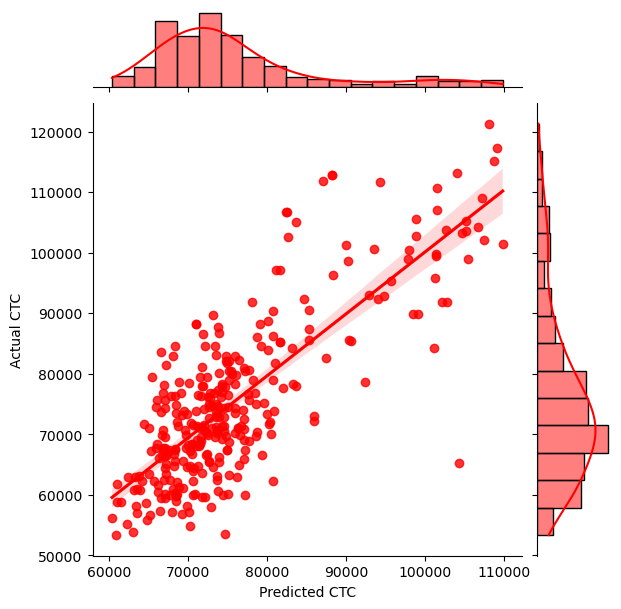

In [77]:
# RandomForestRegressor scatterplot of Actual CTC vs Predicted CTC
sns.jointplot(x =random_forest.predict(x_test), y =y_test, kind = 'reg',color='red')
plt.xlabel('Predicted CTC')
plt.ylabel('Actual CTC')
plt.show()

# GradientBoostingRegressor
        

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=1000, random_state=42)
# Creating and Fitting the model on training data
gb_model.fit(x_train, y_train)
GradientBoostingRegressor(random_state=42)
# Predictions on the test and train data
y_test_pred = gb_model.predict(x_test)
# Evaluating the R2 and MSE scores on train and test data
mse = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train,gb_model.predict(x_train))
print('R2 score for train data :', r2_train)
print('R2 score for test data :', r2_test)
print('Mean Squared Error:', mse)

R2 score for train data : 0.9478983328086666
R2 score for test data : 0.635991668706432
Mean Squared Error: 69250753.66236654


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


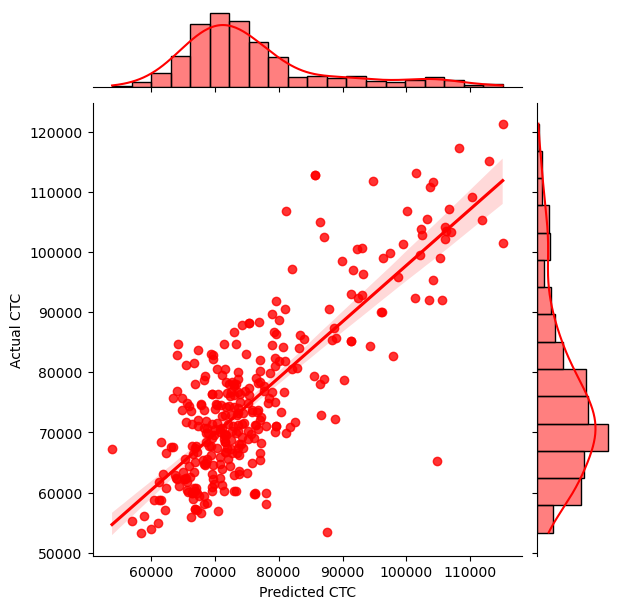

In [79]:
# GradientBoostingRegressor scatterplot of Actual CTC vs Predicted CTC
sns.jointplot(x =gb_model.predict(x_test), y =y_test, kind = 'reg',color='red')
plt.xlabel('Predicted CTC')
plt.ylabel('Actual CTC')
plt.show()

## Best ML model

## GRADIENTBOOSTINGCLASSIFIER

## Project Questions.

#### Ques 1.  Your views about the problem statement?

#### The nature of the data and the problem asked it is quite clear that it is a Regression problem. The project is asking me to analysis different attributes of an employee such as his experience , college performance and previous work to predict salary. This can be achieved by studying the relationshihp of differnet attributes and factors and feeding them to different enhanced machine learning models which will help us in salary predictions. I will use different types of regression approaches to solve this problem.

#### Ques 2. What will be your approach to solving this task?

#### I have adopted a structured way of dealing with this problem which consists of different steps:
#### 1. Data acquisition - This is the first step where we gather all the data from the source required for performing the task
#### 2. Data Preprocessing - This is the second step where we convert the raw and dirty data into a work ready and organized data. The methods used in this process include filling missing values, excluding outliers if any, and encoding categorical variables.
#### 3. Univariate Analysis of the data - Its a step taken to visualize important parameters of the data such as mean,deviation etc to have a brief idea of our data.
#### 4. Bivariate Analysis - In this step we find the correlation of all variables with each other.This is done to exclude variables that are very correlated to each other so as to avoid an error called Multicollinearity in our model.
#### 5.Train-Test-Split - In this step we split entire data into two called train set and test set. This is done so that we can also test the performance of our model and evaluate its efficiency.
#### 6. Model Creation and fitting - In this step we create diffferent ML models and fit our training data in those models.
#### 7. Model Prediction - In this step we can predictions based on the test data
#### 8. Model Evaluation - In this step we evaluate the performance of our model using different preformance metrics such as mean squared error and r square values.
#### 9. Model visualisations - In this step we visualize the predictions of our model on a chart.

#### Ques 3. What were the available ML model options you had to perform this task?

#### To perform this task we can use multiple approaches
#### 1. Linear Regression
#### 2. Ridge Regression 
#### 3. Lasso Regression 
#### 4. Random Forest Regression 
#### 5. Gradient Boosting Regression 

#### Ques 4.  Which model’s performance is best and what could be the possible reason for that?

#### After using all the above approaches the GRADIENT BOOSTING REGRESSOR works best on our data with an R squared value of 0.6359 and MSE value of 69250753. The performance metrices clearly suggested that the GradientBoostingRegressor is the best model for our project. The possible reasons for this can be the methodology used in this model as in this model at every steps residual errors are calculated and adjusted this really boosted the preformance and decreased the error or the distances between the actual and predicted values.

#### Ques 5.  What steps can you take to improve this selected model’s performance even further?

#### To improve the performance of our model the following steps can be taken:
####  1. Data scaling and standardization so as to avoid domination of some features.
####  2. Using gridsearchCV for tuning the values of hyperparameters so as to find the best fit
####  3. Executing cross validation over the data to better train the model 
####  4. Enhancing the quality of the data
####  5. Using predictions from different models and combining them using stacking and other techniques.